# Lab 2

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 四個求根演算法的實作可以參考[lab-2](https://yuanyuyuan.github.io/itcm/lab-2.html)，裡面有教學影片也有範例程式可以套用。
4. **Deadline: 10/9(Wed.)**

In [1]:
name = "歐陽秉志"
student_id = "B05201012"

---

# Exercise 1 - Newton

### Use the Newton's method to find roots of
### $$f(x)=cosh(x)+cos(x)-c \text{, for } c=1, 2, 3,$$

---

### Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### 1. Define the function $g(c)(x)=f(x)=cosh(x)+cos(x)-c$ with parameter $c=1, 2, 3$ and its derivative $df$.

In [3]:
def g(c):
    assert c == 1 or c == 2 or c == 3
    def f(x):
        return np.cosh(x) + np.cos(x) - c           
    return f

def df(x):
    return np.sinh(x) - np.sin(x)
 

Pass the following assertion.

In [4]:
assert g(1)(0) == np.cosh(0) + np.cos(0) - 1
assert df(0) == 0

### 2. Implement the algorithm

In [5]:
def newton(
    func,
    d_func,
    x_0,
    tolerance=1e-7,
    max_iterations=5,
    report_history=False,
    report_xn = False
):
    '''
    Parameters
    ----------
    func : function
        The target function.
    d_func : function
        The derivative of the target function.
    x_0 : float
        Initial guess point for a solution f(x)=0.
    tolerance : float
        One of the termination conditions. Error tolerance.
    max_iterations : int
        One of the termination conditions. The amount of iterations allowed.
    report_history: bool
        Whether to return history.
    report_xn: bool
        Whether to return hostory of x_n.

    Returns
    -------
    solution : float
        Approximation of the root.
    history: dict
        Return history of the solving process if report_history is True.
    '''  

    x_n = x_0
    num_iter = 0
    
    if report_history:
        history = {'estimation': [], 'error': []}
    if report_xn:
        history['lxn'] = []
    
    while True:
        fxn = func(x_n)
        
        error = abs(fxn)
        
        if report_history:
            history['estimation'].append(x_n)
            history['error'].append(error)
        if report_xn:
            history['lxn'].append(x_n)
        
        if error < tolerance:
            print('Found solution after',num_iter,'iterations.')
            return (x_n, history) if report_history else x_n
        
        dfxn = d_func(x_n)
        if dfxn == 0:
            print("f'({}) is 0, no solution found.".format(x_n))
            return (None, history) if report_history else None
        
        if num_iter < max_iterations:
            num_iter += 1
            x_n = x_n - fxn/dfxn
        else:
            print('max iteration achieved.')
            return (x_n, history) if report_history else x_n
    
    
    # ====================

Test your implementation with the assertion below.

In [6]:
root = newton(
    lambda x: x**2 - x - 1, 
    lambda x: 2*x - 1, 
    1.2, 
    max_iterations=100, 
    tolerance=1e-7, 
    report_history=False
)
assert abs(root - ((1 + np.sqrt(5)) / 2)) < 1e-7

Found solution after 4 iterations.


---

### 3. Answer the following questions under the case $c=1$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

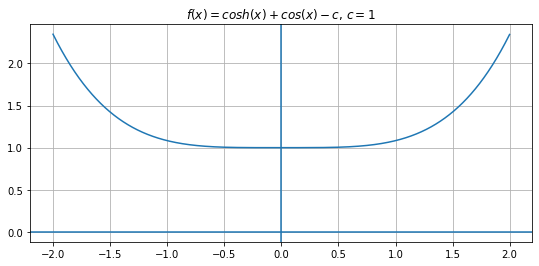

In [7]:
c = 1
f = g(c)

search_range = np.arange(-2.0, 2.0, 0.001)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [8]:
# Hint: root = ?
root = None


In [9]:
print('My estimation of root:', root)

My estimation of root: None


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

In [10]:
root, history = newton(g(c), df, 1, 1e-10, 5, True, True)
print(root)

max iteration achieved.
nan


C:\Users\CM\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in cosh
  
C:\Users\CM\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in sinh
  del sys.path[0]
C:\Users\CM\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in double_scalars


the estimation failed since the function $cosh(x) + cos(x) - 1$ is always positive. It has no root.
But the function returned **nan**, it means some things go wrong, we print our history:

In [11]:
print(history)

{'estimation': [1, -2.2462837106127327, -1.4361344540707535, -0.070283343782922, 8640.947115680312, nan], 'error': [1.0833829406833835, 3.1538891271868454, 1.3553839539854367, 1.0000020334262283, inf, nan], 'lxn': [1, -2.2462837106127327, -1.4361344540707535, -0.070283343782922, 8640.947115680312, nan]}


我們發現找到第四次的時候，x_n 跑到8000多，所以我們把前一次的 x_n 的值代到g(c)和df看看，然後看他們的商

In [12]:
print(g(c)(-0.070283343782922), df(-0.070283343782922))
print('quotient:', g(c)(-0.070283343782922) / df(-0.070283343782922))

1.0000020334262283 -0.00011572734867298928
quotient: -8641.017399024095


所以 x_n 跑到8000多，這是因為微分後的值太小，而這導致g(c)(8640)算不出來（numpy.cosh 算不出來），所以導致nan。

---

### 4. Answer the following questions under the case $c=2$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

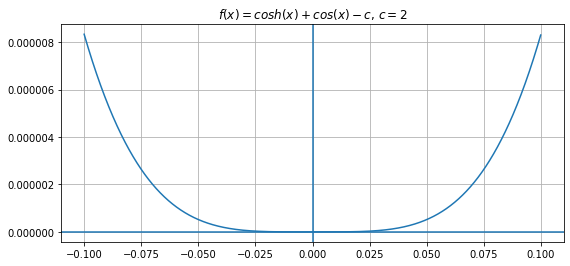

In [13]:
c = 2
f = g(c)

# Hint: search_range = np.arange(左端點, 右端點, 點與點之間距), 
# e.g. search_range = np.arange(0.0, 1.0, 0.01)
# ===== 請實做程式 =====
search_range = np.arange(-0.1, 0.1, 0.0001)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [14]:
# Hint: root = ?
# ===== 請實做程式 =====
root = 0
# ====================

In [15]:
print('My estimation of root:', root)


My estimation of root: 0


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

In [16]:
root, history = newton(g(c), df, 1, 1e-10, 20, True, True)
print(root)

Found solution after 18 iterations.
0.005639346779453498


找到根使得誤差小於 $10^{-10}$

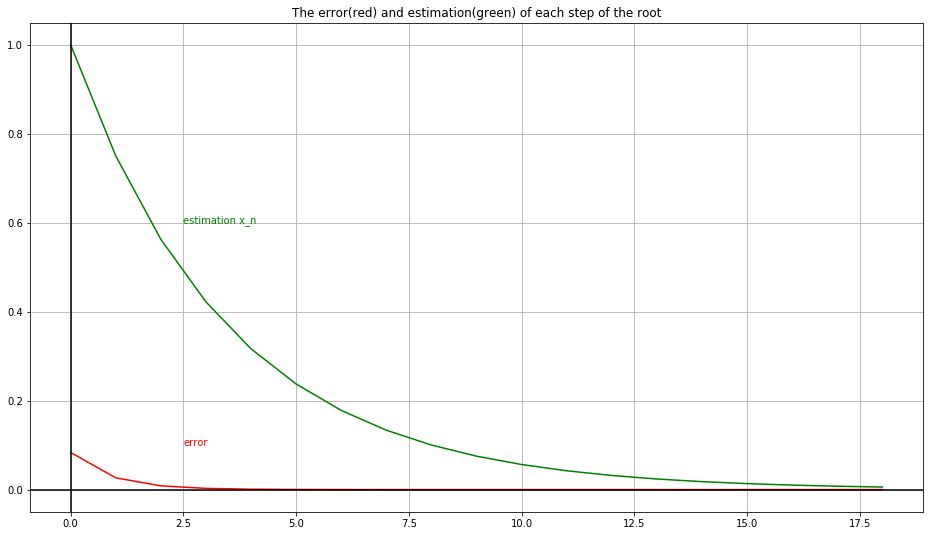

In [17]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(range(len(history['error'])), history['error'], 'r')
ax.plot(range(len(history['estimation'])), history['estimation'], 'g')
ax.set_title("The error(red) and estimation(green) of each step of the root")
ax.annotate('error', (2.5, 0.1), c='r')
ax.annotate('estimation x_n', (2.5, 0.6), c='g')
ax.grid(True)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

---

### 5. Answer the following questions under the case $c=3$.

### Plot the function to find an interval that contains the zeros of $f$ if possible.

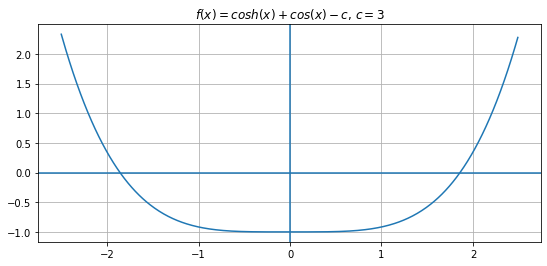

In [18]:
c = 3
f = g(c)

# Hint: search_range = np.arange(左端點, 右端點, 點與點之間距), 
# e.g. search_range = np.arange(0.0, 1.0, 0.01)
# ===== 請實做程式 =====
search_range = np.arange(-2.5, 2.5, 0.01)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [19]:
# Hint: root = ?
# ===== 請實做程式 =====
root = -1.8, 1.8
# ====================

In [20]:
print('My estimation of root:', root)


My estimation of root: (-1.8, 1.8)


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

In [21]:
root1, history1 = newton(g(c), df, 2, 1e-10, 20, True, True)
root2, history2 = newton(g(c), df, -2, 1e-10, 20, True, True)
print("the roots are:", root1, root2)

Found solution after 4 iterations.
Found solution after 4 iterations.
the roots are: 1.8579208291501987 -1.8579208291501987


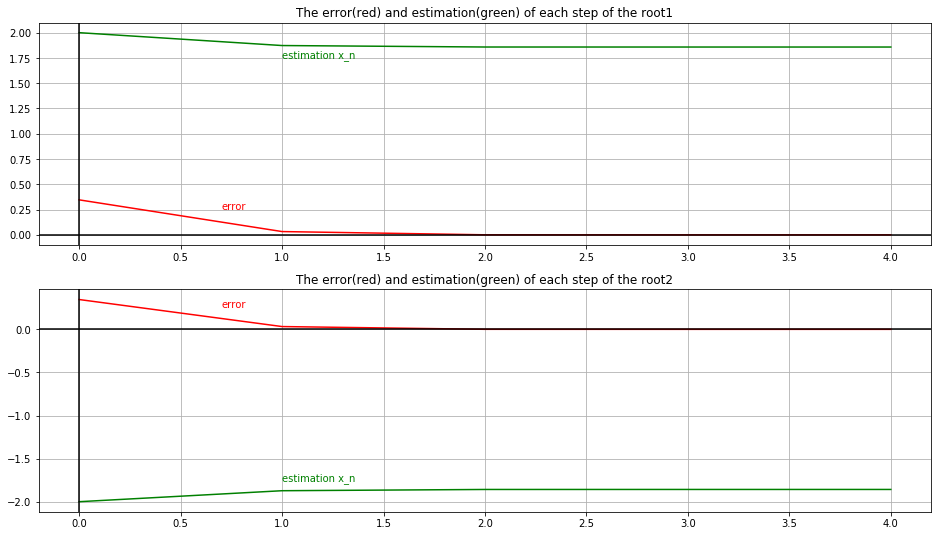

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(16, 9))
ax1, ax2 = axes

ax1.plot(range(len(history1['error'])), history1['error'], 'r')
ax1.plot(range(len(history1['estimation'])), history1['estimation'], 'g')
ax1.set_title("The error(red) and estimation(green) of each step of the root1")
ax1.annotate('error', (0.7, 0.25), c='r')
ax1.annotate('estimation x_n', (1, 1.75), c='g')
ax1.grid(True)
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')

ax2.plot(range(len(history2['error'])), history2['error'], 'r')
ax2.plot(range(len(history2['estimation'])), history2['estimation'], 'g')
ax2.set_title("The error(red) and estimation(green) of each step of the root2")
ax2.annotate('error', (0.7, 0.25), c='r')
ax2.annotate('estimation x_n', (1, -1.75), c='g')
ax2.grid(True)
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')

plt.show()

---

## Discussion

### For all cases above(c=1,2,3), do the results(e.g. error behaviors, estimations, etc) agree with the theoretical analysis?

In [ ]:
c=1 時因為在0點附近的導數會跑到0，g(c)(-0.070283343782922) / df(-0.070283343782922) 是 -8641 左右，這讓 x_n 從0附近跑到 8000 多，所以找不到解

c=2跟c=3都work